Accuracy: 0.734938
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     21995
           1       0.36      0.84      0.50      4097

    accuracy                           0.73     26092
   macro avg       0.66      0.78      0.66     26092
weighted avg       0.87      0.73      0.77     26092



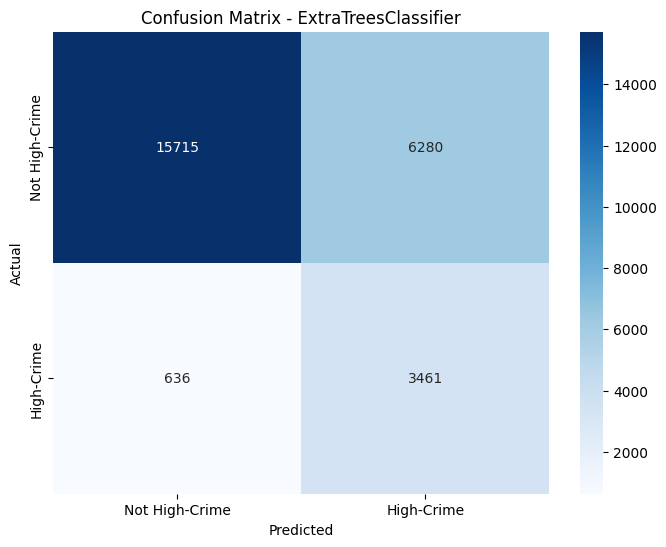

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
file_path = 'preprocessed_crime_data.csv'
df = pd.read_csv(file_path)

# Convert 'DATE OCC' to datetime and extract 'month' and 'year'
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['month'] = df['DATE OCC'].dt.month
df['year'] = df['DATE OCC'].dt.year

# Drop 'DATE OCC' because it’s no longer needed
df = df.drop(columns=['DATE OCC'])

# Split data into training (2020-2022) and testing (2023-2024) sets
train_df = df[df['year'].isin([2020, 2021, 2022])]
test_df = df[df['year'].isin([2023, 2024])]

# Define features and target
X_train = train_df.drop(columns=['Target', 'year', 'Crime Count', 'Is Violent'])
y_train = train_df['Target']
X_test = test_df.drop(columns=['Target', 'year', 'Crime Count', 'Is Violent'])
y_test = test_df['Target']

# Initialize ExtraTreesClassifier parameters
et_classifier = ExtraTreesClassifier(
    n_estimators=300,
    class_weight="balanced",
    max_features=0.8,
    min_samples_split=10,
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
# Train the model
et_classifier.fit(X_train, y_train)

# Make predictions
y_pred = et_classifier.predict(X_test)

# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Classification Report:")
print(report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Not High-Crime', 'High-Crime'],
    yticklabels=['Not High-Crime', 'High-Crime']
)
plt.title('Confusion Matrix - ExtraTreesClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()